## Create data set from file

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

input_file = "CompareComplementation.csv"

data_raw = pd.read_csv(input_file)
data_raw

,NAM 1 Hum BME280,NAM 1 Hum SHT30,NAM 2 Hum BME280,NAM 2 Hum SHT30,NAM 1 Temp BME280,NAM 1 Temp SHT30,NAM 2 Temp BME280,NAM 2 Temp SHT30,Luftdaten 1 PM10,Luftdaten 2 PM10,...,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5
0,32.98,35.59,29.52,32.98,22.44,22.62,24.35,24.25,2.68,10.27,...,1.76,4.84,1.52,2.49,37.3,10.7,13.3,12.4,2.4,3.9
1,29.13,31.28,27.58,30.53,23.75,24.13,25.11,25.16,2.82,6.03,...,1.62,3.09,1.23,2.46,36.3,11.3,16.5,10.8,2.0,3.1
2,29.48,31.67,28.70,32.03,24.26,24.49,25.40,25.27,2.76,6.36,...,1.66,3.36,1.30,1.98,30.1,9.9,20.4,10.2,1.5,3.3
3,28.76,31.13,28.01,31.30,24.17,24.33,25.25,25.00,2.12,9.83,...,1.52,5.66,1.28,3.35,33.1,12.3,10.6,11.1,1.9,2.7
4,27.21,29.69,27.12,30.23,25.75,25.76,26.10,25.88,2.12,2.30,...,1.52,0.93,1.30,1.04,34.9,13.1,12.8,11.2,1.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,89.46,85.31,94.57,67.04,20.45,20.58,19.72,25.03,27.61,19.37,...,25.00,13.79,16.25,11.45,34.0,24.4,25.2,30.2,19.7,19.7
8780,81.89,78.67,92.20,64.60,22.03,22.36,20.78,25.86,23.26,18.63,...,21.05,12.93,15.94,12.51,33.1,18.8,19.3,28.1,14.8,14.9
8781,70.47,69.35,83.17,61.38,25.05,25.35,22.73,27.14,18.68,15.48,...,17.02,10.87,13.49,11.55,31.3,17.2,15.6,22.3,13.1,11.1
8782,60.90,61.44,72.81,59.39,27.05,27.34,25.11,27.46,14.55,12.36,...,13.27,8.72,10.95,9.86,36.8,15.1,14.8,20.1,10.7,9.5


## Reorder columns

In [8]:
col_order = ["NAM 1 Temp BME280", "NAM 2 Temp BME280",
             "NAM 1 Hum BME280", "NAM 2 Hum BME280",
             "NAM 1 Temp SHT30", "NAM 2 Temp SHT30",
             "NAM 1 Hum SHT30", "NAM 2 Hum SHT30",
             "Luftdaten 1 PM2.5","NAM 1 PM2.5", "Luftdaten 2 PM2.5", "NAM 2 PM2.5",
             "Reference 1 PM2.5", "Reference 2 PM2.5", "Reference 3 PM2.5",
             "Luftdaten 1 PM10","NAM 1 PM10", "Luftdaten 2 PM10", "NAM 2 PM10",
             "Reference 1 PM10", "Reference 2 PM10", "Reference 3 PM10"]

data = data_raw[col_order].copy()
data

,NAM 1 Temp BME280,NAM 2 Temp BME280,NAM 1 Hum BME280,NAM 2 Hum BME280,NAM 1 Temp SHT30,NAM 2 Temp SHT30,NAM 1 Hum SHT30,NAM 2 Hum SHT30,Luftdaten 1 PM2.5,NAM 1 PM2.5,...,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10
0,22.44,24.35,32.98,29.52,22.62,24.25,35.59,32.98,1.76,1.52,...,12.4,2.4,3.9,2.68,2.86,10.27,5.07,37.3,10.7,13.3
1,23.75,25.11,29.13,27.58,24.13,25.16,31.28,30.53,1.62,1.23,...,10.8,2.0,3.1,2.82,2.36,6.03,4.79,36.3,11.3,16.5
2,24.26,25.40,29.48,28.70,24.49,25.27,31.67,32.03,1.66,1.30,...,10.2,1.5,3.3,2.76,2.53,6.36,4.02,30.1,9.9,20.4
3,24.17,25.25,28.76,28.01,24.33,25.00,31.13,31.30,1.52,1.28,...,11.1,1.9,2.7,2.12,1.90,9.83,6.65,33.1,12.3,10.6
4,25.75,26.10,27.21,27.12,25.76,25.88,29.69,30.23,1.52,1.30,...,11.2,1.8,2.6,2.12,2.87,2.30,2.73,34.9,13.1,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20.45,19.72,89.46,94.57,20.58,25.03,85.31,67.04,25.00,16.25,...,30.2,19.7,19.7,27.61,18.02,19.37,14.87,34.0,24.4,25.2
8780,22.03,20.78,81.89,92.20,22.36,25.86,78.67,64.60,21.05,15.94,...,28.1,14.8,14.9,23.26,17.63,18.63,16.83,33.1,18.8,19.3
8781,25.05,22.73,70.47,83.17,25.35,27.14,69.35,61.38,17.02,13.49,...,22.3,13.1,11.1,18.68,14.91,15.48,14.81,31.3,17.2,15.6
8782,27.05,25.11,60.90,72.81,27.34,27.46,61.44,59.39,13.27,10.95,...,20.1,10.7,9.5,14.55,12.33,12.36,12.53,36.8,15.1,14.8


## Remove rows without data from all sensors

In [9]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data

,NAM 1 Temp BME280,NAM 2 Temp BME280,NAM 1 Hum BME280,NAM 2 Hum BME280,NAM 1 Temp SHT30,NAM 2 Temp SHT30,NAM 1 Hum SHT30,NAM 2 Hum SHT30,Luftdaten 1 PM2.5,NAM 1 PM2.5,...,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10
0,22.44,24.35,32.98,29.52,22.62,24.25,35.59,32.98,1.76,1.52,...,12.4,2.4,3.9,2.68,2.86,10.27,5.07,37.3,10.7,13.3
1,23.75,25.11,29.13,27.58,24.13,25.16,31.28,30.53,1.62,1.23,...,10.8,2.0,3.1,2.82,2.36,6.03,4.79,36.3,11.3,16.5
2,24.26,25.40,29.48,28.70,24.49,25.27,31.67,32.03,1.66,1.30,...,10.2,1.5,3.3,2.76,2.53,6.36,4.02,30.1,9.9,20.4
3,24.17,25.25,28.76,28.01,24.33,25.00,31.13,31.30,1.52,1.28,...,11.1,1.9,2.7,2.12,1.90,9.83,6.65,33.1,12.3,10.6
4,25.75,26.10,27.21,27.12,25.76,25.88,29.69,30.23,1.52,1.30,...,11.2,1.8,2.6,2.12,2.87,2.30,2.73,34.9,13.1,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20.45,19.72,89.46,94.57,20.58,25.03,85.31,67.04,25.00,16.25,...,30.2,19.7,19.7,27.61,18.02,19.37,14.87,34.0,24.4,25.2
8780,22.03,20.78,81.89,92.20,22.36,25.86,78.67,64.60,21.05,15.94,...,28.1,14.8,14.9,23.26,17.63,18.63,16.83,33.1,18.8,19.3
8781,25.05,22.73,70.47,83.17,25.35,27.14,69.35,61.38,17.02,13.49,...,22.3,13.1,11.1,18.68,14.91,15.48,14.81,31.3,17.2,15.6
8782,27.05,25.11,60.90,72.81,27.34,27.46,61.44,59.39,13.27,10.95,...,20.1,10.7,9.5,14.55,12.33,12.36,12.53,36.8,15.1,14.8


## Calculate average values of relative humidity, temperature, PM2.5 and PM10

In [10]:
data.insert(2, "NAM average Temp", (data["NAM 1 Temp BME280"] + data["NAM 2 Temp BME280"]) / 2)
data.insert(5, "NAM average Hum", (data["NAM 1 Hum BME280"] + data["NAM 2 Hum BME280"]) / 2)
data.insert(17, "Reference PM2.5", (data["Reference 2 PM2.5"] + data["Reference 1 PM2.5"] 
                                    + data["Reference 3 PM2.5"]) / 3)
data.insert(25, "Reference PM10", (data["Reference 2 PM10"] + data["Reference 1 PM10"] 
                                    + data["Reference 3 PM10"]) / 3)

data

,NAM 1 Temp BME280,NAM 2 Temp BME280,NAM average Temp,NAM 1 Hum BME280,NAM 2 Hum BME280,NAM average Hum,NAM 1 Temp SHT30,NAM 2 Temp SHT30,NAM 1 Hum SHT30,NAM 2 Hum SHT30,...,Reference 3 PM2.5,Reference PM2.5,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference PM10
0,22.44,24.35,23.395,32.98,29.52,31.250,22.62,24.25,35.59,32.98,...,3.9,6.233333,2.68,2.86,10.27,5.07,37.3,10.7,13.3,20.433333
1,23.75,25.11,24.430,29.13,27.58,28.355,24.13,25.16,31.28,30.53,...,3.1,5.300000,2.82,2.36,6.03,4.79,36.3,11.3,16.5,21.366667
2,24.26,25.40,24.830,29.48,28.70,29.090,24.49,25.27,31.67,32.03,...,3.3,5.000000,2.76,2.53,6.36,4.02,30.1,9.9,20.4,20.133333
3,24.17,25.25,24.710,28.76,28.01,28.385,24.33,25.00,31.13,31.30,...,2.7,5.233333,2.12,1.90,9.83,6.65,33.1,12.3,10.6,18.666667
4,25.75,26.10,25.925,27.21,27.12,27.165,25.76,25.88,29.69,30.23,...,2.6,5.200000,2.12,2.87,2.30,2.73,34.9,13.1,12.8,20.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20.45,19.72,20.085,89.46,94.57,92.015,20.58,25.03,85.31,67.04,...,19.7,23.200000,27.61,18.02,19.37,14.87,34.0,24.4,25.2,27.866667
8780,22.03,20.78,21.405,81.89,92.20,87.045,22.36,25.86,78.67,64.60,...,14.9,19.266667,23.26,17.63,18.63,16.83,33.1,18.8,19.3,23.733333
8781,25.05,22.73,23.890,70.47,83.17,76.820,25.35,27.14,69.35,61.38,...,11.1,15.500000,18.68,14.91,15.48,14.81,31.3,17.2,15.6,21.366667
8782,27.05,25.11,26.080,60.90,72.81,66.855,27.34,27.46,61.44,59.39,...,9.5,13.433333,14.55,12.33,12.36,12.53,36.8,15.1,14.8,22.233333


## Helper functions

In [11]:
def add_empty_line(filename):
    with open(filename,'a') as file:
        file.write("\n")

def add_text(filename, text):
    with open(filename,'a') as file:
        file.write(text + "\n")

def add_separator(filename):
    with open(filename,'a') as file:
        file.write("##########\n\n")

def clear_file(filename):
    with open(filename,'w') as file:
        file.write("")

## Define conditions

In [12]:
humid = data["NAM average Hum"] >= 70.0
dry = data["NAM average Hum"] <= 40.0
cold = data["NAM average Temp"] <= 5.0
hot = data["NAM average Temp"] >= 10.0
heater_on_NAM_1 = data["NAM 1 Hum BME280"] - data["NAM 1 Hum SHT30"] >= 15.0
heater_on_NAM_2 = data["NAM 2 Hum BME280"] - data["NAM 2 Hum SHT30"] >= 15.0
high_PM25 = data["Reference PM2.5"] >= 30
low_PM25 = data["Reference PM2.5"] <= 15
high_PM10 = data["Reference PM10"] >= 50
low_PM10 = data["Reference PM10"] <= 25

# Full data set
data_sel = data.copy()

# Constrains applied
#data_sel = data[high_PM10 & high_PM25 & heater_on_Sielce & heater_on_Becka]

comment = "Data description"

output_file = "ResultsComplementation.csv"
clear_file(output_file)
add_separator(output_file)
add_text(output_file, comment)
add_empty_line(output_file)

data_sel

,NAM 1 Temp BME280,NAM 2 Temp BME280,NAM average Temp,NAM 1 Hum BME280,NAM 2 Hum BME280,NAM average Hum,NAM 1 Temp SHT30,NAM 2 Temp SHT30,NAM 1 Hum SHT30,NAM 2 Hum SHT30,...,Reference 3 PM2.5,Reference PM2.5,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference PM10
0,22.44,24.35,23.395,32.98,29.52,31.250,22.62,24.25,35.59,32.98,...,3.9,6.233333,2.68,2.86,10.27,5.07,37.3,10.7,13.3,20.433333
1,23.75,25.11,24.430,29.13,27.58,28.355,24.13,25.16,31.28,30.53,...,3.1,5.300000,2.82,2.36,6.03,4.79,36.3,11.3,16.5,21.366667
2,24.26,25.40,24.830,29.48,28.70,29.090,24.49,25.27,31.67,32.03,...,3.3,5.000000,2.76,2.53,6.36,4.02,30.1,9.9,20.4,20.133333
3,24.17,25.25,24.710,28.76,28.01,28.385,24.33,25.00,31.13,31.30,...,2.7,5.233333,2.12,1.90,9.83,6.65,33.1,12.3,10.6,18.666667
4,25.75,26.10,25.925,27.21,27.12,27.165,25.76,25.88,29.69,30.23,...,2.6,5.200000,2.12,2.87,2.30,2.73,34.9,13.1,12.8,20.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,20.45,19.72,20.085,89.46,94.57,92.015,20.58,25.03,85.31,67.04,...,19.7,23.200000,27.61,18.02,19.37,14.87,34.0,24.4,25.2,27.866667
8780,22.03,20.78,21.405,81.89,92.20,87.045,22.36,25.86,78.67,64.60,...,14.9,19.266667,23.26,17.63,18.63,16.83,33.1,18.8,19.3,23.733333
8781,25.05,22.73,23.890,70.47,83.17,76.820,25.35,27.14,69.35,61.38,...,11.1,15.500000,18.68,14.91,15.48,14.81,31.3,17.2,15.6,21.366667
8782,27.05,25.11,26.080,60.90,72.81,66.855,27.34,27.46,61.44,59.39,...,9.5,13.433333,14.55,12.33,12.36,12.53,36.8,15.1,14.8,22.233333


## Calculations

### Mean values

In [13]:
output_PM25 = "PM2.5\n\
Luftdaten 1:,{0:.2f},±,{1:.2f}\n\
NAM 1:,{2:.2f},±,{3:.2f}\n\
Luftdaten 2:,{4:.2f},±,{5:.2f}\n\
NAM 2:,{6:.2f},±,{7:.2f}\n\
Reference 1:,{8:.2f},±,{9:.2f}\n\
Reference 2:,{10:.2f},±,{11:.2f}\n\
Reference 3:,{12:.2f},±,{13:.2f}".format(data_sel["Luftdaten 1 PM2.5"].mean(), data_sel["Luftdaten 1 PM2.5"].std(),
                                   data_sel["NAM 1 PM2.5"].mean(), data_sel["NAM 1 PM2.5"].std(),
                                   data_sel["Luftdaten 2 PM2.5"].mean(), data_sel["Luftdaten 2 PM2.5"].std(),
                                   data_sel["NAM 2 PM2.5"].mean(), data_sel["NAM 2 PM2.5"].std(),
                                   data_sel["Reference 1 PM2.5"].mean(), data_sel["Reference 1 PM2.5"].std(),
                                   data_sel["Reference 2 PM2.5"].mean(), data_sel["Reference 2 PM2.5"].std(),
                                   data_sel["Reference 3 PM2.5"].mean(), data_sel["Reference 3 PM2.5"].std())

output_PM10 = "PM10\n\
Luftdaten 1:,{0:.2f},±,{1:.2f}\n\
NAM 1:,{2:.2f},±,{3:.2f}\n\
Luftdaten 2:,{4:.2f},±,{5:.2f}\n\
NAM 2:,{6:.2f},±,{7:.2f}\n\
Reference 1:,{8:.2f},±,{9:.2f}\n\
Reference 2:,{10:.2f},±,{11:.2f}\n\
Reference 3:,{12:.2f},±,{13:.2f}".format(data_sel["Luftdaten 1 PM10"].mean(), data_sel["Luftdaten 1 PM10"].std(),
                                   data_sel["NAM 1 PM10"].mean(), data_sel["NAM 1 PM10"].std(),
                                   data_sel["Luftdaten 2 PM10"].mean(), data_sel["Luftdaten 2 PM10"].std(),
                                   data_sel["NAM 2 PM10"].mean(), data_sel["NAM 2 PM10"].std(),
                                   data_sel["Reference 1 PM10"].mean(), data_sel["Reference 1 PM10"].std(),
                                   data_sel["Reference 2 PM10"].mean(), data_sel["Reference 2 PM10"].std(),
                                   data_sel["Reference 3 PM10"].mean(), data_sel["Reference 3 PM10"].std())

output_conditions = "Conditions\n\
Temperature:,{0:.2f},±,{1:.2f}\n\
Humidity:,{2:.2f},±,{3:.2f}".format(data_sel["NAM average Temp"].mean(), data_sel["NAM average Temp"].std(),
                                    data_sel["NAM average Hum"].mean(), data_sel["NAM average Hum"].std())

add_text(output_file, "Average values of PM2.5 and PM10 (ug/m3)")
add_text(output_file, output_PM25)
add_empty_line(output_file)
add_text(output_file, output_PM10)
add_empty_line(output_file)
add_text(output_file, output_conditions)
add_empty_line(output_file)

print(output_PM25.replace(","," "))
print()
print(output_PM10.replace(","," "))
print()
print(output_conditions.replace(","," "))

PM2.5
Luftdaten 1: 13.67 ± 14.53
NAM 1: 10.94 ± 10.77
Luftdaten 2: 8.26 ± 7.79
NAM 2: 10.35 ± 10.43
Reference 1: 21.50 ± 10.71
Reference 2: 17.21 ± 15.92
Reference 3: 13.38 ± 9.88

PM10
Luftdaten 1: 21.52 ± 28.02
NAM 1: 17.52 ± 18.01
Luftdaten 2: 17.98 ± 17.47
NAM 2: 22.08 ± 24.22
Reference 1: 32.98 ± 17.01
Reference 2: 24.00 ± 18.19
Reference 3: 19.97 ± 14.37

Conditions
Temperature: 13.33 ± 8.28
Humidity: 61.98 ± 19.14


### Select only PM data

In [14]:
data_sel_pm25 = data_sel.iloc[:,[10,11,12,13,17]].copy()
data_sel_pm25

,Luftdaten 1 PM2.5,NAM 1 PM2.5,Luftdaten 2 PM2.5,NAM 2 PM2.5,Reference PM2.5
0,1.76,1.52,4.84,2.49,6.233333
1,1.62,1.23,3.09,2.46,5.300000
2,1.66,1.30,3.36,1.98,5.000000
3,1.52,1.28,5.66,3.35,5.233333
4,1.52,1.30,0.93,1.04,5.200000
...,...,...,...,...,...
8779,25.00,16.25,13.79,11.45,23.200000
8780,21.05,15.94,12.93,12.51,19.266667
8781,17.02,13.49,10.87,11.55,15.500000
8782,13.27,10.95,8.72,9.86,13.433333


In [15]:
data_sel_pm10 = data_sel.iloc[:,[18,19,20,21,25]].copy()
data_sel_pm10

,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference PM10
0,2.68,2.86,10.27,5.07,20.433333
1,2.82,2.36,6.03,4.79,21.366667
2,2.76,2.53,6.36,4.02,20.133333
3,2.12,1.90,9.83,6.65,18.666667
4,2.12,2.87,2.30,2.73,20.266667
...,...,...,...,...,...
8779,27.61,18.02,19.37,14.87,27.866667
8780,23.26,17.63,18.63,16.83,23.733333
8781,18.68,14.91,15.48,14.81,21.366667
8782,14.55,12.33,12.36,12.53,22.233333


## PM2.5

### Pearson correlations for PM2.5

In [16]:
result = data_sel_pm25.corr(method="pearson").round(3)
add_text(output_file, "Pearson correlations for PM2.5")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 PM2.5,NAM 1 PM2.5,Luftdaten 2 PM2.5,NAM 2 PM2.5,Reference PM2.5
Luftdaten 1 PM2.5,1.000,0.929,0.953,0.872,0.846
NAM 1 PM2.5,0.929,1.000,0.971,0.898,0.889
Luftdaten 2 PM2.5,0.953,0.971,1.000,0.902,0.878
NAM 2 PM2.5,0.872,0.898,0.902,1.000,0.794
Reference PM2.5,0.846,0.889,0.878,0.794,1.000


### Kendall correlations for PM2.5

In [17]:
result = data_sel_pm25.corr(method="kendall").round(3)
add_text(output_file, "Kendall correlations for PM2.5")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 PM2.5,NAM 1 PM2.5,Luftdaten 2 PM2.5,NAM 2 PM2.5,Reference PM2.5
Luftdaten 1 PM2.5,1.000,0.899,0.887,0.854,0.731
NAM 1 PM2.5,0.899,1.000,0.901,0.883,0.764
Luftdaten 2 PM2.5,0.887,0.901,1.000,0.871,0.740
NAM 2 PM2.5,0.854,0.883,0.871,1.000,0.711
Reference PM2.5,0.731,0.764,0.740,0.711,1.000


### Spearman correlations for PM2.5

In [18]:
result = data_sel_pm25.corr(method="spearman").round(3)
add_text(output_file, "Spearman correlations for PM2.5")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 PM2.5,NAM 1 PM2.5,Luftdaten 2 PM2.5,NAM 2 PM2.5,Reference PM2.5
Luftdaten 1 PM2.5,1.000,0.985,0.980,0.963,0.902
NAM 1 PM2.5,0.985,1.000,0.984,0.966,0.922
Luftdaten 2 PM2.5,0.980,0.984,1.000,0.964,0.906
NAM 2 PM2.5,0.963,0.966,0.964,1.000,0.881
Reference PM2.5,0.902,0.922,0.906,0.881,1.000


### Reference sensors PM2.5 comparison

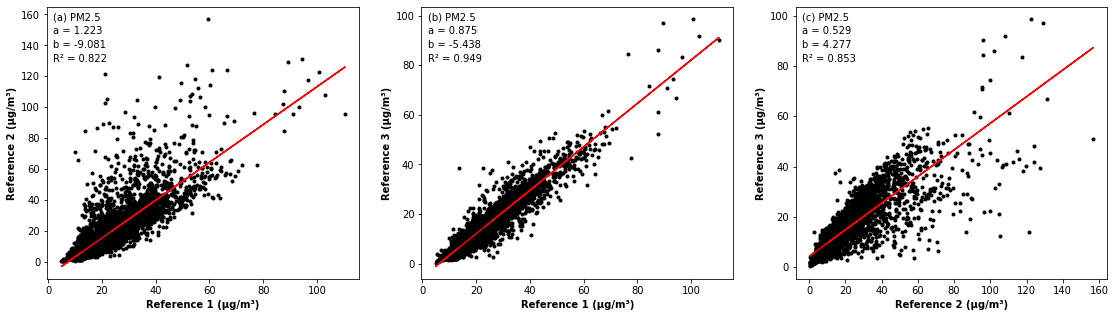

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19,5))

x = data_sel["Reference 1 PM2.5"]
y = data_sel["Reference 2 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("Reference 2 (µg/m³)", fontweight="bold")

x = data_sel["Reference 1 PM2.5"]
y = data_sel["Reference 3 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM2.5", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax2.set_ylabel("Reference 3 (µg/m³)", fontweight="bold")

x = data_sel["Reference 2 PM2.5"]
y = data_sel["Reference 3 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM2.5", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Reference 2 (µg/m³)", fontweight="bold")
ax3.set_ylabel("Reference 3 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_reference_PM25.png")
plt.show()

### Comparison between Luftdaten and NAM for PM2.5

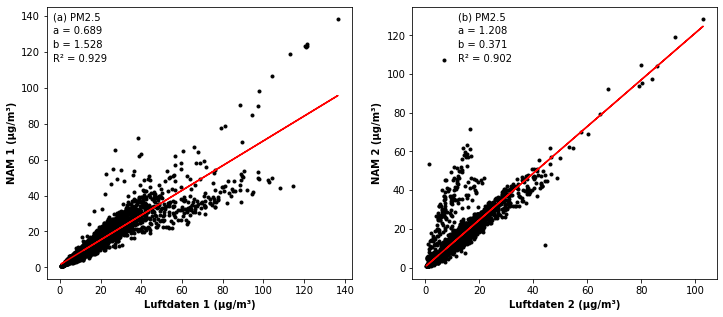

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

x = data_sel["Luftdaten 1 PM2.5"]
y = data_sel["NAM 1 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Luftdaten 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("NAM 1 (µg/m³)", fontweight="bold")

x = data_sel["Luftdaten 2 PM2.5"]
y = data_sel["NAM 2 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.15
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM2.5", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Luftdaten 2 (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 2 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_LC_regressions_PM25.png")
plt.show()

### Linear regression for PM2.5

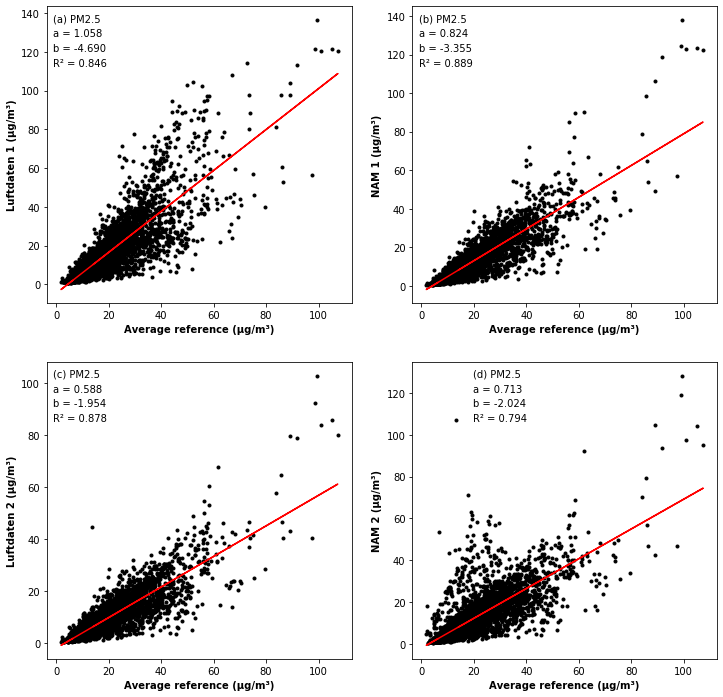

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

x = data_sel["Reference PM2.5"]
y = data_sel["Luftdaten 1 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten 1 (µg/m³)", fontweight="bold")

y = data_sel["NAM 1 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM2.5", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 1 (µg/m³)", fontweight="bold")

y = data_sel["Luftdaten 2 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM2.5", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax3.set_ylabel("Luftdaten 2 (µg/m³)", fontweight="bold")

y = data_sel["NAM 2 PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax4.plot(x, y, "k.")
ax4.plot(x, intercept + slope*x, "r")
text_pos_x = 0.20
text_pos_y = 0.95
ax4.text(text_pos_x, text_pos_y, "(d) PM2.5", transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax4.transAxes)
ax4.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax4.set_ylabel("NAM 2 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_regressions_PM25.png")
plt.show()

## PM10

### Pearson correlations for PM10

In [22]:
result = data_sel_pm10.corr(method="pearson").round(3)
add_text(output_file, "Pearson correlations for PM10")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference PM10
Luftdaten 1 PM10,1.000,0.856,0.925,0.768,0.566
NAM 1 PM10,0.856,1.000,0.954,0.842,0.671
Luftdaten 2 PM10,0.925,0.954,1.000,0.838,0.676
NAM 2 PM10,0.768,0.842,0.838,1.000,0.542
Reference PM10,0.566,0.671,0.676,0.542,1.000


### Kendall correlations for PM10

In [23]:
result = data_sel_pm10.corr(method="kendall").round(3)
add_text(output_file, "Kendall correlations for PM10")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference PM10
Luftdaten 1 PM10,1.000,0.881,0.882,0.839,0.414
NAM 1 PM10,0.881,1.000,0.896,0.878,0.459
Luftdaten 2 PM10,0.882,0.896,1.000,0.864,0.463
NAM 2 PM10,0.839,0.878,0.864,1.000,0.433
Reference PM10,0.414,0.459,0.463,0.433,1.000


### Spearman correlations for PM10

In [24]:
result = data_sel_pm10.corr(method="spearman").round(3)
add_text(output_file, "Spearman correlations for PM10")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
add_separator(output_file)
result

,Luftdaten 1 PM10,NAM 1 PM10,Luftdaten 2 PM10,NAM 2 PM10,Reference PM10
Luftdaten 1 PM10,1.000,0.980,0.980,0.958,0.592
NAM 1 PM10,0.980,1.000,0.983,0.963,0.644
Luftdaten 2 PM10,0.980,0.983,1.000,0.962,0.649
NAM 2 PM10,0.958,0.963,0.962,1.000,0.609
Reference PM10,0.592,0.644,0.649,0.609,1.000


### Reference sensors PM10 comparison

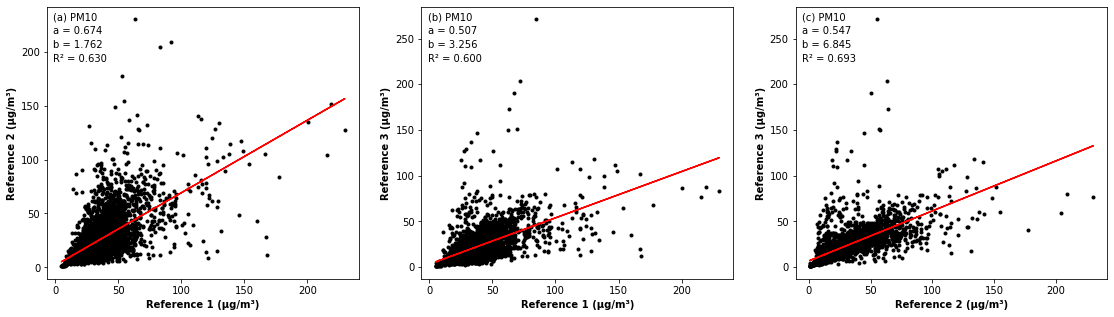

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19,5))

x = data_sel["Reference 1 PM10"]
y = data_sel["Reference 2 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM10", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("Reference 2 (µg/m³)", fontweight="bold")

x = data_sel["Reference 1 PM10"]
y = data_sel["Reference 3 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Reference 1 (µg/m³)", fontweight="bold")
ax2.set_ylabel("Reference 3 (µg/m³)", fontweight="bold")

x = data_sel["Reference 2 PM10"]
y = data_sel["Reference 3 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM10", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Reference 2 (µg/m³)", fontweight="bold")
ax3.set_ylabel("Reference 3 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_reference_PM10.png")
plt.show()

### Comparison between Luftdaten and NAM for PM10

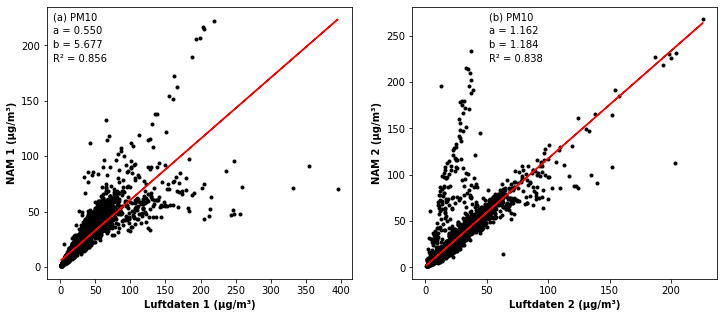

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

x = data_sel["Luftdaten 1 PM10"]
y = data_sel["NAM 1 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM10", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Luftdaten 1 (µg/m³)", fontweight="bold")
ax1.set_ylabel("NAM 1 (µg/m³)", fontweight="bold")

x = data_sel["Luftdaten 2 PM10"]
y = data_sel["NAM 2 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.25
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Luftdaten 2 (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 2 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_LC_regressions_PM10.png")
plt.show()

### Linear regression for PM10

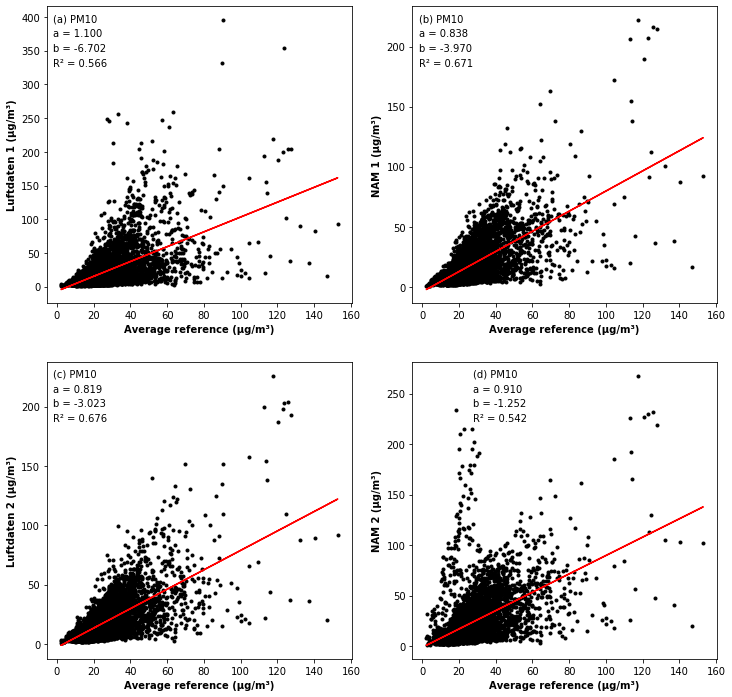

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

x = data_sel["Reference PM10"]
y = data_sel["Luftdaten 1 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM10", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten 1 (µg/m³)", fontweight="bold")

y = data_sel["NAM 1 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM10", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 1 (µg/m³)", fontweight="bold")

y = data_sel["Luftdaten 2 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM10", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax3.set_ylabel("Luftdaten 2 (µg/m³)", fontweight="bold")

y = data_sel["NAM 2 PM10"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax4.plot(x, y, "k.")
ax4.plot(x, intercept + slope*x, "r")
text_pos_x = 0.20
text_pos_y = 0.95
ax4.text(text_pos_x, text_pos_y, "(d) PM10", transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax4.transAxes)
ax4.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax4.set_ylabel("NAM 2 (µg/m³)", fontweight="bold")

plt.savefig("Complementation_regressions_PM10.png")
plt.show()